# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [4]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

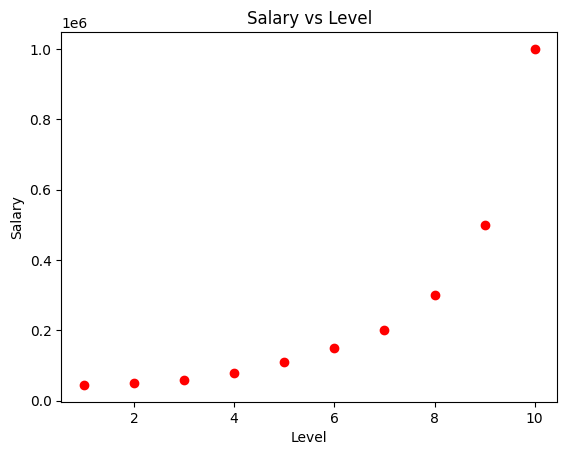

In [5]:
# your code(s)
dataset = pd.read_csv('/content/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
plt.scatter(X, y, color='red')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?

> * No
* Explain why you said yes or no to the above questions.
> * Given the scatter plot, it's clear that the association between salary and level doesn't follow a straight line, indicating that a basic linear regression model wouldn't effectively capture the pattern.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

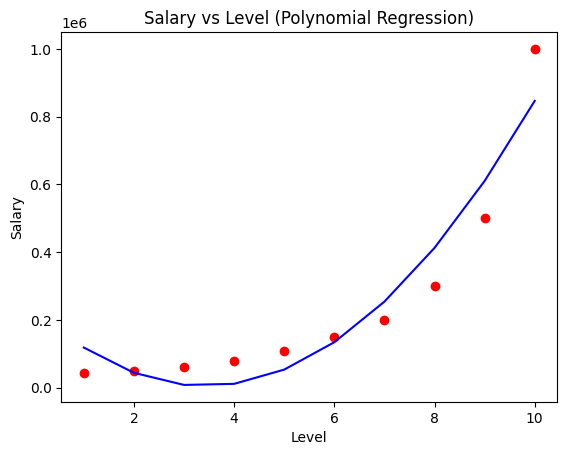

In [6]:
# your code to plot the cost function (if required)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Salary vs Level (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * Your answer

Derivatives of cost function:*

# Derivatives of cost function
$$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^N \left( wx_i^2 + bx_i - y_i x_i \right) $$

$$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( wx_i + b - y_i \right) $$


*

Repeat until converges:

# Gradient Descent Algorithm
$$w = w -\alpha \frac{d}{dw}MSE(w,b) $$
$$b = b -\alpha \frac{d}{dw}MSE(w,b) $$

## Implementation of the model

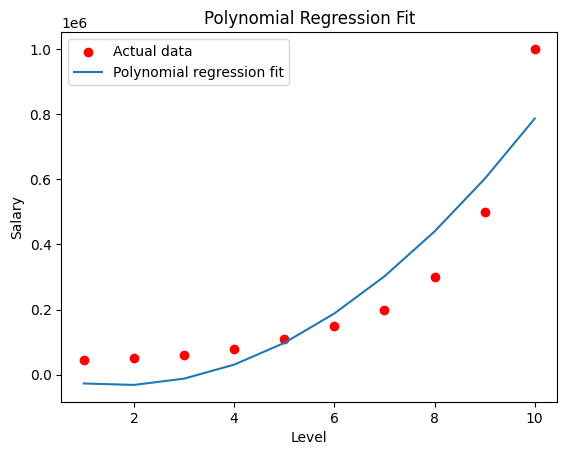

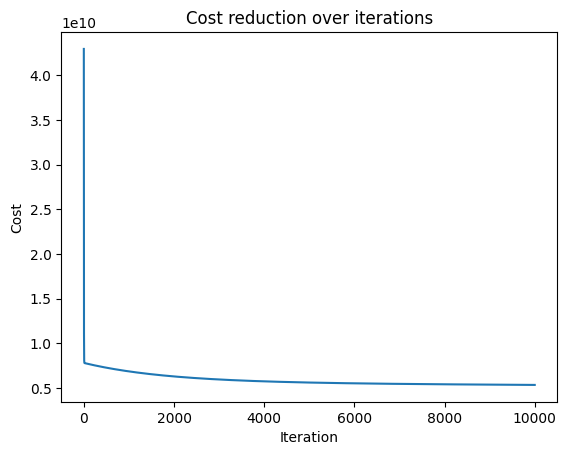

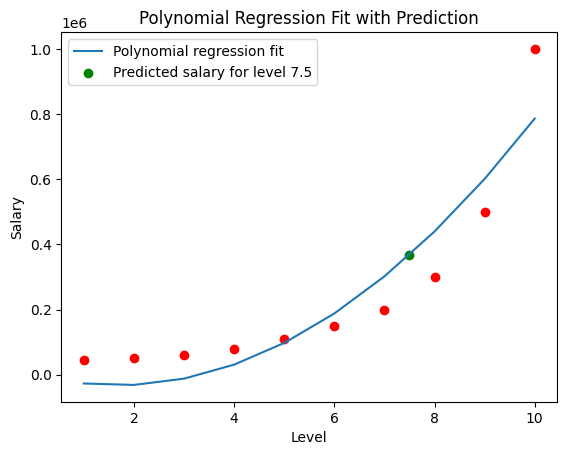

Predicted Salary for level 7.5: $367,915.23


In [7]:
# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
df = pd.read_csv('/content/Position_Salaries.csv')
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")

### Answer the following

* What is learning rate?
> *A learning rate is a hyperparameter that determines the size of the steps taken during the optimization process in machine learning algorithms, such as gradient descent. It controls the amount of adjustment made to the model's parameters with each iteration, balancing the trade-off between convergence speed and stability.
* What will happen if the learning rate is too large?
> * When the learning rate is large, gradient descent might overshoot the minimum of the loss function, preventing convergence, or it could bounce around the minimum, causing slow convergence
* What will happen if the learning rate is too small?
> * A small learning rate causes gradient descent to take tiny steps toward the minimum, potentially resulting in slow convergence or becoming trapped in local minima.
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
>*Model Function Adjustment: Modify the polynomial model function to include terms up to the third degree
> * Adjustment of Input Features: Ensure your input data includes the third-order terms.Your answer
> * Theta Initialization: Initialize parameters (weights and bias) for the third-order model accordingly
> * Plot Adjustment: When visualizing the model, you'll need to plot a curve that represents a third-order polynomial instead of a quadratic one. This might involve generating more data points to create a smoother curve or fitting a higher-order polynomial through the data points.
